In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
# Load the images directories
path = "./dataset/"
image_paths = list(paths.list_images(path))

In [4]:
images = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    images.append(image)
    labels.append(label)

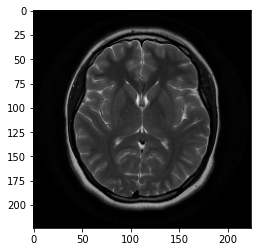

In [6]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])

In [7]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np
images = np.array(images) / 255.0
labels = np.array(labels)
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

# Build the model

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [10]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

58892288/58889256 [==============================] - 58s 1us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Train the model

In [14]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [15]:
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)

C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
28/28 [==============================] - 85s 3s/step - loss: 0.7078 - accuracy: 0.5703 - val_loss: 0.6281 - val_accuracy: 0.6154
Epoch 2/10
28/28 [==============================] - 84s 3s/step - loss: 0.6339 - accuracy: 0.6774 - val_loss: 0.5942 - val_accuracy: 0.6154
Epoch 3/10
28/28 [==============================] - 84s 3s/step - loss: 0.6533 - accuracy: 0.6021 - val_loss: 0.5587 - val_accuracy: 0.7692
Epoch 4/10
28/28 [==============================] - 96s 3s/step - loss: 0.5949 - accuracy: 0.7065 - val_loss: 0.5271 - val_accuracy: 0.9231
Epoch 5/10
28/28 [==============================] - 88s 3s/step - loss: 0.6350 - accuracy: 0.6763 - val_loss: 0.5015 - val_accuracy: 0.8077
Epoch 6/10
28/28 [==============================] - 89s 3s/step - loss: 0.5897 - accuracy: 0.7252 - val_loss: 0.4994 - val_accuracy: 0.9615
Epoch 7/10
28/28 [==============================] - 88s 3s/step - loss: 0.5839 - accuracy: 0.7526 - val_loss: 0.4371 - val_accuracy: 0.9615
Epoch 8/10
28/28 [==

In [34]:
lastAcc = len(history.history["accuracy"]) - 1
print("Accuracy: {:.4f}".format(history.history["accuracy"][lastAcc]))

Accuracy: 0.7854


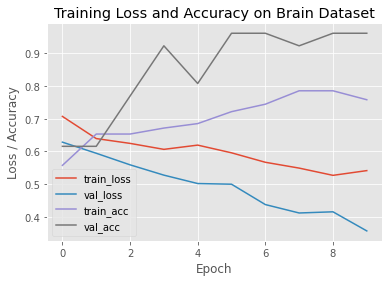

In [20]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")
plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")

In [37]:
print(model.metrics_names)
print(model.evaluate(test_X,test_Y,verbose=0))

['loss', 'accuracy']
[0.35639116168022156, 0.9615384340286255]


In [52]:
predict_x=model.predict(test_X) 
classes=np.argmax(predict_x,axis=1)

In [54]:
predict

array([[0.04959406, 0.95040596],
       [0.02058233, 0.97941774],
       [0.04446093, 0.9555391 ],
       [0.8381435 , 0.16185653],
       [0.07256822, 0.92743176],
       [0.11269695, 0.887303  ],
       [0.589371  , 0.41062897],
       [0.43212843, 0.5678716 ],
       [0.50167036, 0.49832958],
       [0.07256822, 0.92743176],
       [0.68847406, 0.311526  ],
       [0.70390314, 0.29609686],
       [0.12561251, 0.8743875 ],
       [0.8425263 , 0.15747365],
       [0.05239707, 0.947603  ],
       [0.04691386, 0.9530862 ],
       [0.87044156, 0.12955844],
       [0.06575603, 0.9342439 ],
       [0.3287651 , 0.6712349 ],
       [0.03171984, 0.96828014],
       [0.05689098, 0.94310904],
       [0.07697547, 0.9230246 ],
       [0.06849592, 0.9315041 ],
       [0.7561409 , 0.24385913],
       [0.19661705, 0.80338293],
       [0.8616571 , 0.13834299]], dtype=float32)